In [1]:
# VGG 16 

In [2]:
from PIL import Image
import os
os.chdir('C:/Users/nourg/OneDrive/Bureau/Deep Learning') #define directory 

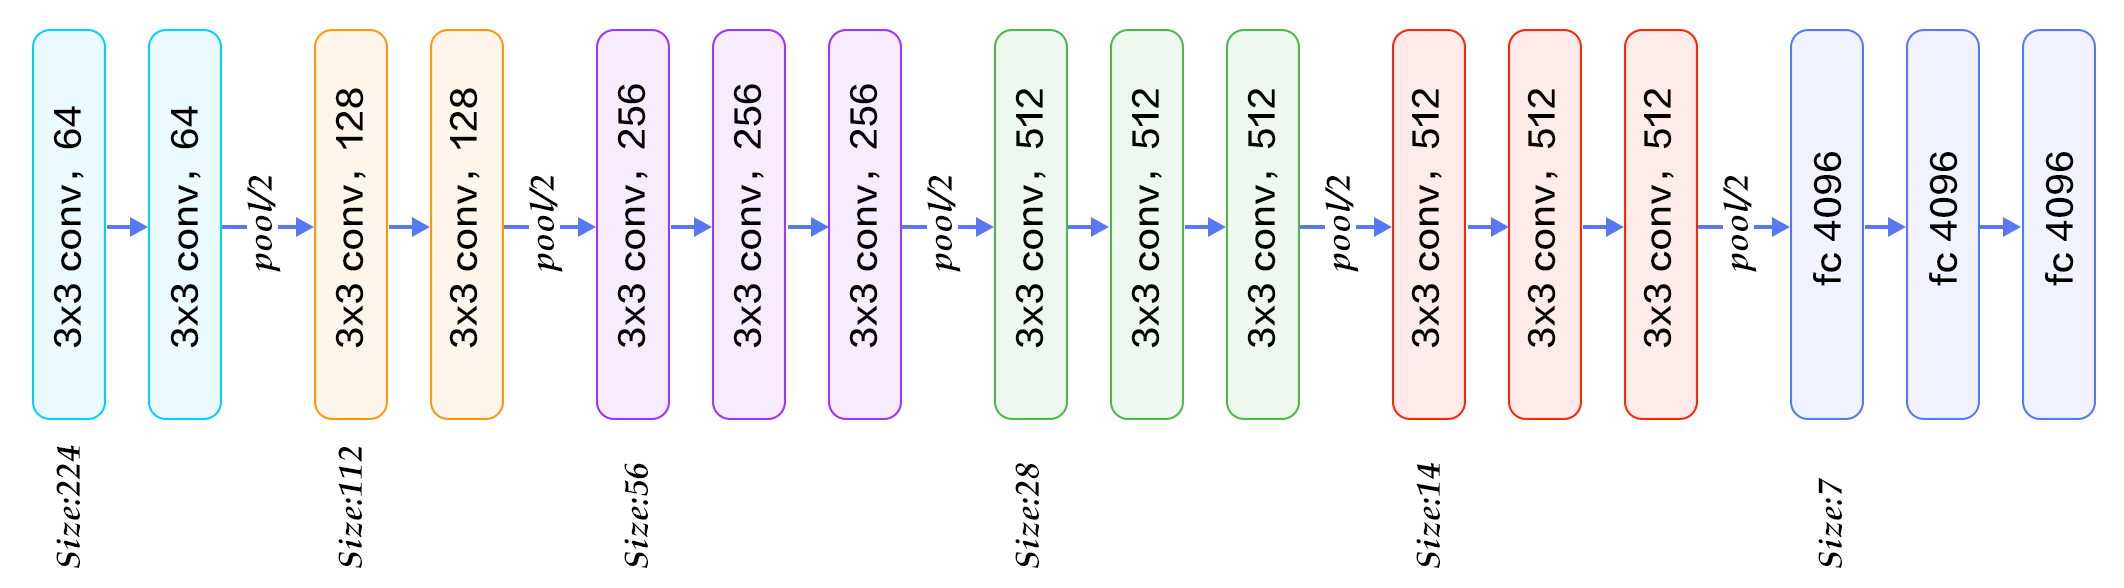

In [3]:
archi = Image.open('archi.png')
archi

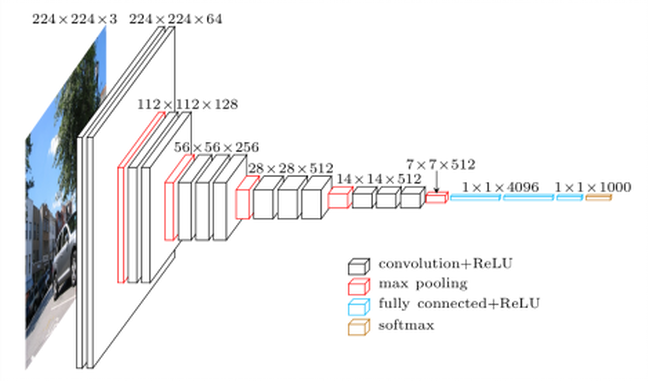

In [4]:
rep3D = Image.open('rep3D.png')
rep3D

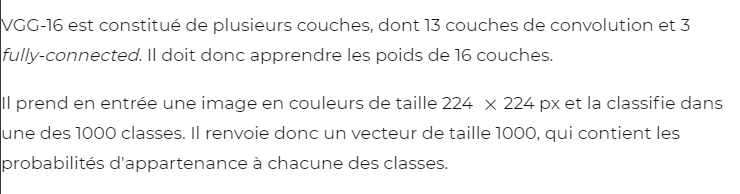

In [5]:
exp1 = Image.open('exp1.png')
exp1

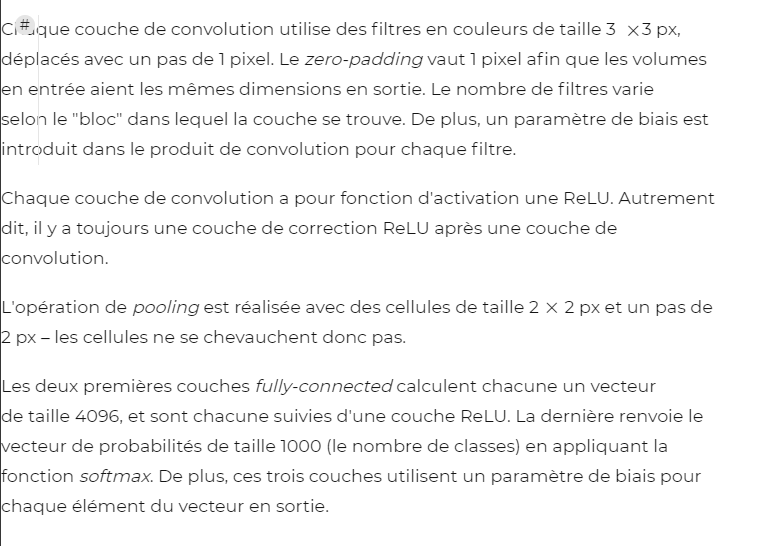

In [6]:
exp2 = Image.open('exp2.png')
exp2

In [7]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [8]:
my_VGG16 = Sequential() #création d'un réseau de neurones vide 

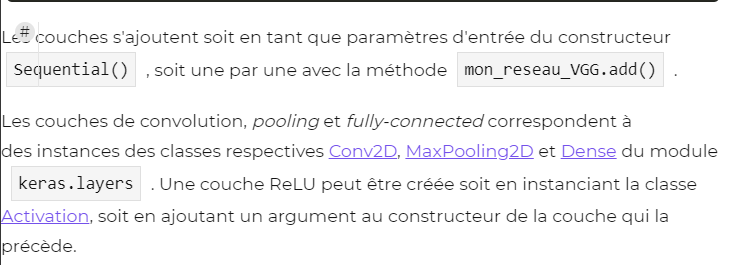

In [9]:
methode = Image.open('howto.png')
methode

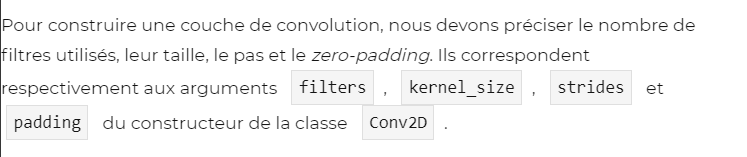

In [10]:
classconv2D = Image.open('conv2D.png')
classconv2D

In [11]:
# Ajout de la première couche de convolution, suivie d'une couche ReLU

#input_shape : c'est la toute première couche du réseau, il faut préciser les dimensions des images en entrée du réseau 

my_VGG16.add(Conv2D(64,(3,3), input_shape=(224,224,3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie d'une couche ReLU

my_VGG16.add(Conv2D(64,(3,3), padding='same', activation='relu'))

#Ajout de la première couche de pooling

my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

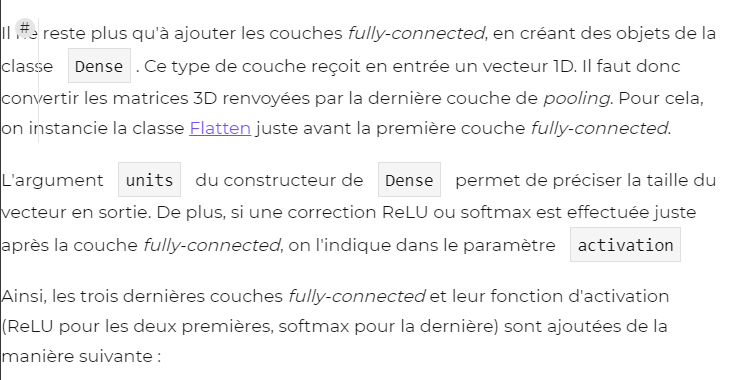

In [12]:
fc = Image.open('fc.png')
fc

In [13]:
from keras.layers import Flatten
from keras.layers import Dense

my_VGG16.add(Flatten()) # Conversion des matrices 3D en vecteur 1D (passage de la dernière couche de pooling à la première couche fully connected)

#Ajout de la première couche fully connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation = 'relu'))

#Ajout de la deuxieme couche fully connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation = 'relu'))

#Ajout de la dernière couche fully connected qui permet de classifier
my_VGG16.add(Dense(1000, activation = 'softmax'))

In [15]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modele VGG16 implementé par Keras 

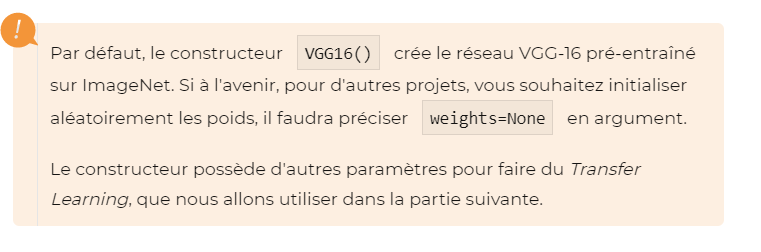

In [16]:
vgg = Image.open('vgg.png')
vgg

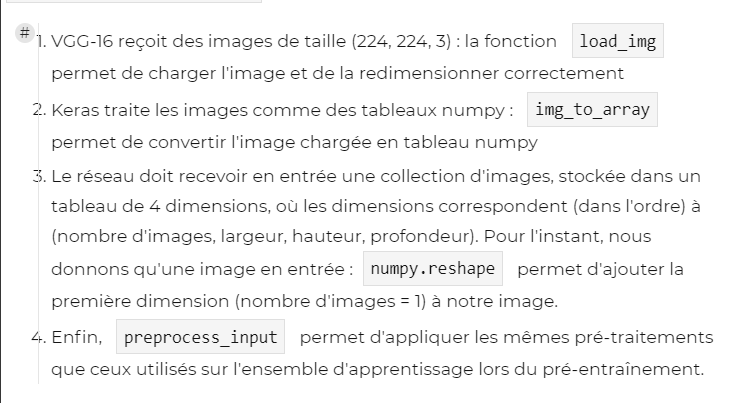

In [18]:
#Traitement des images
treat = Image.open('treat.png')
treat


In [27]:
# On prépare l'image comme ci-dessus

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img('cat.jpg', target_size=(224,224)) #chargement de l'image
img = img_to_array(img) #conversion en tableau numpy

img = img.reshape( (1,img.shape[0],img.shape[1],img.shape[2]) ) #créatoin de la collection d'images (ici une seule)
img = preprocess_input(img) #prétraiter l'image comme le veut VGG-16

In [28]:
#prédiction de la classe de l'entrée

In [30]:
y = model.predict(img)

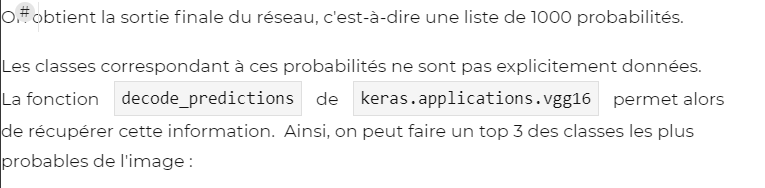

In [33]:
pred = Image.open('pred.png')
pred

In [35]:
from keras.applications.vgg16 import decode_predictions

#Affcher les 3 classes les plus probables

print('Top 3:', decode_predictions(y,top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Top 3: [('n02123045', 'tabby', 0.5350219), ('n02123159', 'tiger_cat', 0.2817639), ('n02124075', 'Egyptian_cat', 0.120555304)]


In [36]:
# Transfer Learninng : fine-tuning total, extraction des features, fine-tuning partiel 

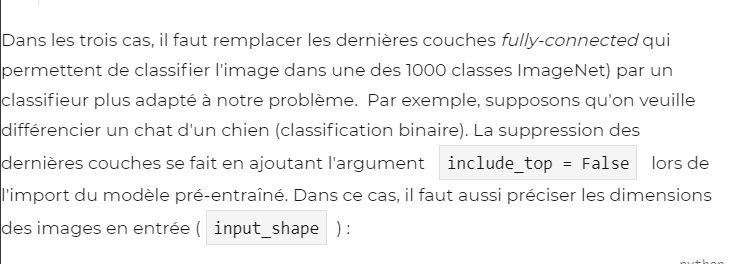

In [37]:
tl = Image.open('tl.png')
tl

In [41]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model 

#Charger VGG-16 pré entrainé sur ImageNet et sans les couches fc 

model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

In [47]:
# sortie de ce réseau 
x = model.output

#Ajouter la nouvelle couche fc pour la class à 10 classes
prédictions = Dense(10, activation='softmax')(x)

# Définir le nouveau modele
new_model = Model(inputs=model.input, outputs=prédictions)

In [49]:
# Stratégie 1 : fine-tuning total : on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables"

for layer in model.layers:
    layer.trainable = True 

In [50]:
# Stratégie 2 : extraction de features : on entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :

for layer in model.layers:
    layer.trainable = False

In [54]:
# Stratégie 3 : fine-tuning partiel : on entraine le nouveau classifieur et les couches hautes 

# Ne pas entraîner les 5 premières couches (les plus basses) 

for layer in model.layers[:5]:
    layer.trainable = False

In [56]:
#Entrainement du réseau : il ne reste plus qu'à compiler le nouveau modele puis à l'entrainer 

#compiler le modele 

new_model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

#entrainer sur les données d'entrainement (xtrain, ytrain)

model_info = new_model.fit(X_train, y_train, epochs=epochs, 
                          batch_size=batch_size, verbose=2)

NameError: name 'optimizers' is not defined